In [ ]:
pip install ktrain

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

### Load the data

In [3]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Cross validation

In [5]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(df,test_size=0.2,random_state=0)

In [6]:
data_train.shape,data_test.shape

((4457, 2), (1115, 2))

### Data Preparation 

In [7]:
(X_train,y_train),(X_test,y_test),preproc = text.texts_from_df(
    train_df=data_train,
    text_column='text',
    label_columns='label',
    val_df= data_test,
    preprocess_mode='bert'  # uncase bert downloaded (or distilbert)

)

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


## Build the classifier

In [9]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', #or distilbert
                             train_data=(X_train,y_train),
                             preproc=preproc
                             )

Is Multi-Label? False
maxlen is 400


c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [10]:
type(model)

keras.src.engine.functional.Functional

## 

In [11]:
# Here we have taken batch size as 6 as from the documentation it is 
# recommended to use this with maxlen as 500
learner = ktrain.get_learner(model=model,train_data=(X_train,y_train),
                             val_data=(X_test,y_test),
                             batch_size=6)

In [12]:
learner

simulating training for different learning rates... this may take a few moments...


c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 6190s 8s/step - loss: 0.3241 - accuracy: 0.8499
Epoch 2/2
743/743 [==============================] - 2648s 4s/step - loss: 1.8692 - accuracy: 0.7788


c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


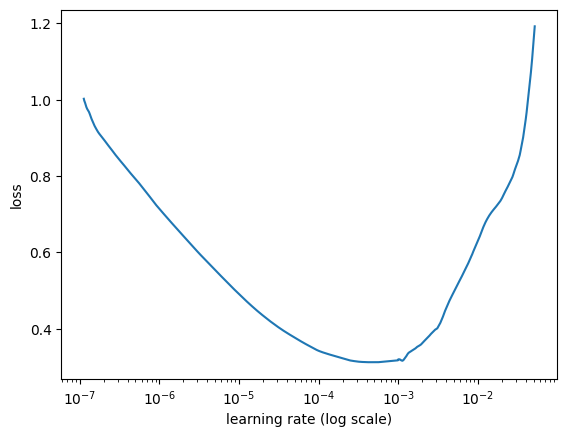

In [13]:
learner.lr_find(show_plot=True,max_epochs=2)